# Project Title : Customer Profile Development for Cardio Good Fitness, Inc.

Student : Cameron Presley

Version : 2021.01.25

email : cameron@ignitedzen.net

Dataset Filename : CardioGoodFitness.csv

# project description and deliverables

Description
Objective - Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.

You are expected to do the following :

Come up with a customer profile (characteristics of a customer) of the different products
Perform uni-variate and multi-variate analyses
Generate a set of insights and recommendations that will help the company in targeting new customers
Context - The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

Product - the model no. of the treadmill

Age - in no of years, of the customer

Gender - of the customer

Education - in no. of years, of the customer

Marital Status - of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

Income - of the customer

Miles- expected to run

Explore the dataset to identify differences between customers of each product. You can also explore relationships between the different attributes of customers. You can approach it from any other line of questioning that you feel could be relevant for the business.

Minimum Steps for exploration:

Importing the dataset into Python & understanding the structure of the dataset
Basic summary of data and graphical exploration
Observations from the dataset
Submission Guidelines :

Please note the following:

There are two parts to the submission: 
A well commented Jupyter notebook [format - .ipynb]
A presentation as you would present to the top management [format - .ppt /.pptx] 
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as post-deadline assignment will not be accepted
Your submission will not be evaluated if it contains more than 2 files.


# questions of interest - planning for analysis


Planning for analysis - what are the questions I want to answer about this data set?

For treadmills overall

Who buys more treadmills - men or women?

What is the typical age group for customers?

What is the age groups by gender?

When someone does buy, how many miles are the interested in running?

How many times a week will they use it?

split by demographics, and other attributes such as income, marital status, education, fitness (self-assessed)?

# build header + import necessary libraries : numpy, pandas, seaborn, matplotlib.pyplot

In [1]:
#Build a basic program header

student = 'Cameron Presley'
version = '2021.01.25'
email = 'cameron@ignitedzen.net'
title =  'Customer Profile Development for Cardio Good Fitness, Inc.'
dataset_filename = 'CardioGoodFitness.csv'

print ('Project Title :', title)
print ('')
print ('Student :', student)
print ('')
print ('Version :', version)
print ('')
print ('email :', email)
print ('')
print ('Dataset Filename :', dataset_filename)
print ('')





#Import the neccesary libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

#use seaborn styling - white grid - not a fan of darkgrid

sns.set_style("whitegrid")


#Load Customer Data and check the basic struture ( the shape - rows + columns)

data = pd.read_csv('CardioGoodFitness.csv')


# we should always protect the original data, so assigning the data to another variable to prevent changes to the original data set
# create a variable called cust - short for customer data

cust = data.copy()

#Determine the basic shape of the data - # of rows and # of cols

print ('The data set has the basic shape (rows, columns):', cust.shape)





Project Title : Customer Profile Development for Cardio Good Fitness, Inc.

Student : Cameron Presley

Version : 2021.01.25

email : cameron@ignitedzen.net

Dataset Filename : CardioGoodFitness.csv

The data set has the basic shape (rows, columns): (180, 9)


# Check details about the dataframe :  column headers + data types and then pre-process any data types that need to be converted & check for missing data

In [2]:
cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


This dataframe has variables with Dtypes 'object' that need to be converted to Category as a best practice to support model development

In [3]:
#convert Product and Gender, and MaritalStatus to Category vs. Object

cust['Product']=cust.Product.astype('category')
cust['Gender']=cust.Gender.astype('category')
cust['MaritalStatus']=cust.MaritalStatus.astype('category')

cust.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [4]:
#the data shape and info tell us that there are 180 rows and 9 columns.  
#The .info() suggests that we don't have any missing data
# the datatypes are clean now
#perform one other check using df.describe

cust.describe (include='all')



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Some Early Observations:

1. There are 3 unique product types to be studied across the balance of the data set
2. Ages range from 18 yrs to 50 years
3. Males are the most frequent Gender type
4. Education levels indicate minimum of HS eduction and a max of Post Graduate level and the average education of 3 years of college.  We should explore if that is closely connected to the Age distribution?  Namely, is the average influenced by college students (3rd year) as customers.
5. The predominance of Customers are Partnered (i.e., MaritalStatus).
6. Customers want to use the equipment an average of 3.5 times per week, with a minimum usage of 2 days per week, maximum of 7 days per week within +/- 1 day.  During these days, they expect to run between 21 to 360 miles with an average miles run of 103miles.
7. Customers have an average fitness of 3 on a scale of 5
8.  Customers income ranges from $ 29.5K to $ 104.K with a mean income of $ 53.7K.


# sample the data frame (top 10 rows) + explore characteristics of the dataset

In [5]:

cust.head(10)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [6]:
#Check to ensure no missing values [even though the .info check suggests nothing missing]

cust.isna().sum()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
#no missing data so....

#Pull the 5 number summary of the data (All Product Types)

cust.describe ()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
#Explore Covariance of the data set - how do the variables directionally trend toward each other or away from each other

cust.cov()


,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


Comments:
    
    All the variables have a positive covariance which means they tend to move together.
    None of the variables move inversely with respect to one another.
    
    

In [9]:
#Explore correlation of the data set - namely are the variables highly correlated : target correlation factors of 0.8 to 0.9 to indicate higher correlation while lower values indicate poor correlation


cust.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


Correlation for all numerical variables is generally poor (i.e., < 0.8-0.9).
The best correlation of numerical variables make sense:
    1. Customers desire for Usage and miles are generally correlated
    2. Same for fitness and miles...
    3. Fitness and expected usage are somewhat correlated.
    
    

# EDA

# univariate analysis

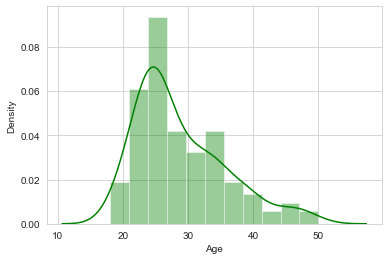

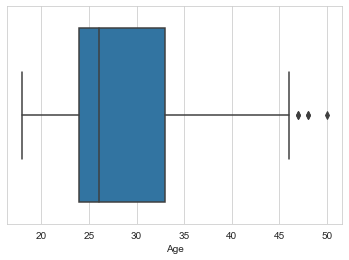

In [10]:
#Age Distribution

sns.distplot(cust['Age'],color='green')
plt.show()
sns.boxplot(cust['Age'],orient='v')
plt.show()


1.  Right skewness with a central tendency around mid-to-late twenties
2. Some notable outliers above 46-47 years


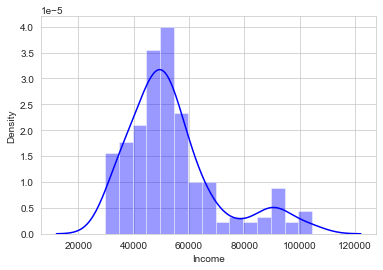

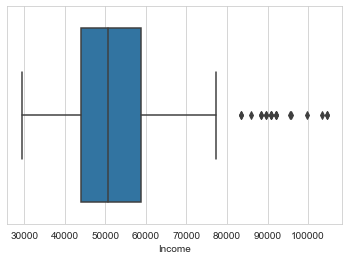

In [11]:
#Income Distribution
sns.distplot (cust['Income'], color = 'blue')
plt.show()
sns.boxplot(cust['Income'],orient='v')
plt.show()


1.  Income has a bi-modal distribution
2. There are significant number of outliers beyond the high $70K per year income range.  Average income is close to $50K per year visually.
3.  It is intuitive that age and income might be highly correlated but the data doesn't support.
4.  It's possible that the age and income is highly correlated for the incomes closer to the max value and the second mode.

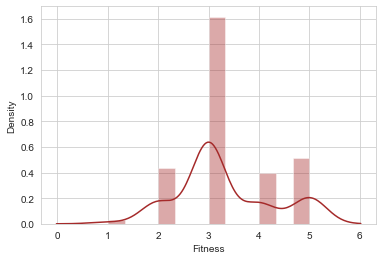

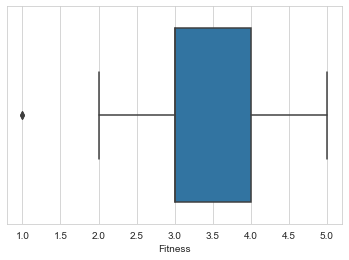

In [12]:
#Fitness Distribution
sns.distplot (cust['Fitness'], color = 'brown')
plt.show()
sns.boxplot(cust['Fitness'],orient='v')
plt.show()

The mean value of self rated fitness is a 3 out of 5 and is normally distributed between a min of 1 (being not fit) and 5 (being very fit)

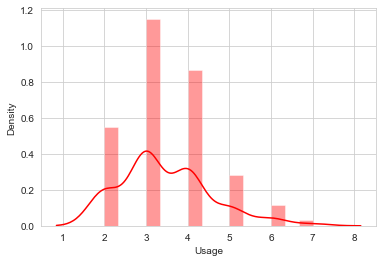

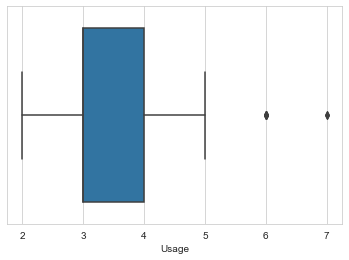

In [13]:
#Usage Distribution
sns.distplot (cust['Usage'], color = 'red')
plt.show()
sns.boxplot(cust['Usage'],orient='v')
plt.show()

Customers generally want to use the equipment 3-4 times per week with the minimum desiring to use it 2X per week and the maximum 5X per week.  There are an isolated # of users who might use it 6 to 7 X per week.

Data is right skewed.



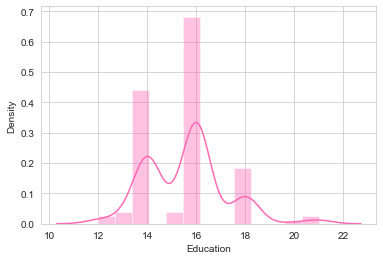

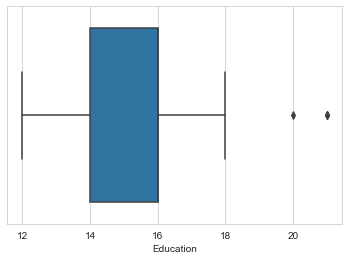

In [14]:
#Education
sns.distplot (cust['Education'], color = 'hotpink')
plt.show()
sns.boxplot(cust['Education'],orient='v')
plt.show()

The disrtibution has ~ 3 modes and is generally centered around customers being college graduates (i.e., having a Bachelors Degree).  Intuition would suggest that Education/Age would be highly correlated, however they aren't.  The correlation factor is about 0.2, so these people with 2 years college are not necessarily younger customers.

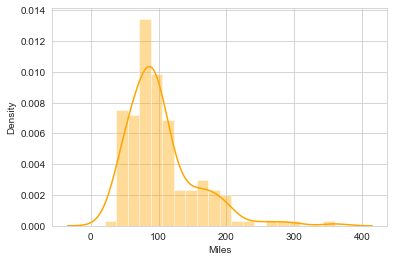

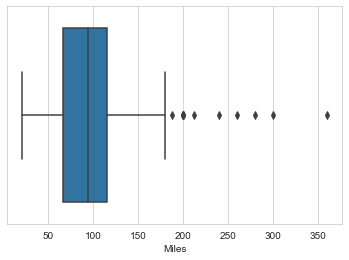

In [15]:
#Miles Distribution
sns.distplot (cust['Miles'], color = 'orange')
plt.show()
sns.boxplot(cust['Miles'],orient='v')
plt.show()

Customer generally want to hover around 75-110 miles, with a maximum around 170 miles.  However there are quite a few outliers of customers that want great than 1.5X IQR and an Grand Max of > 360 miles.

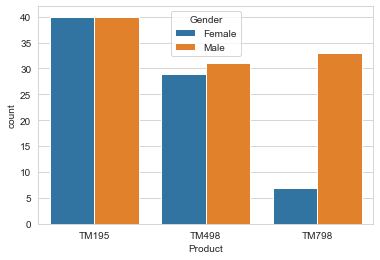

In [16]:
#How many Males v Females buy each product type
sns.countplot(cust['Product'], hue = cust['Gender'])
plt.show()


1.  The TM195 product is the most popular treadmill and an even number of Men and Women buy this product.
2.  The T498 is next most populat and generally slightly more men buy buy this product than women.
3.  The TM798 is the 3rd most popular product, however about 4X more men buy this product than women.  Why?


In [17]:
#Explore Age by Product
cust[["Age", "Product"]].groupby("Product").mean()


,Age
Product,
TM195,28.55
TM498,28.90
TM798,29.10


In [18]:
#Explore Age by Product - MEAN, MAX, Quantile
print ('MEAN Age by Product')
cust[["Age", "Product"]].groupby("Product").min()



MEAN Age by Product


,Age
Product,
TM195,18
TM498,19
TM798,22


In [19]:
print ('MIN Age By Product')
cust[["Age", "Product"]].groupby("Product").max()


MIN Age By Product


,Age
Product,
TM195,50
TM498,48
TM798,48


In [20]:
#Q1
print ('')
print ('QUANTILE = 0.25')
cust[["Age", "Product"]].groupby("Product").quantile(0.25)


QUANTILE = 0.25


,Age
Product,
TM195,23.00
TM498,24.00
TM798,24.75


In [21]:
#Q3
print ('')
print ('QUANTILE = 0.75')
cust[["Age", "Product"]].groupby("Product").quantile(0.75)


QUANTILE = 0.75


,Age
Product,
TM195,33.00
TM498,33.25
TM798,30.25


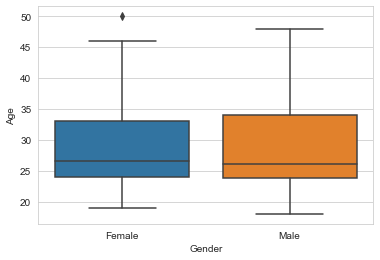

In [22]:
# What is the distribution of Age by Gender
sns.boxplot(y='Age',x='Gender',data=cust)
plt.show()

What do we know about Gender v. Age?

The distribution of Age by Gender is very similar.  The middle 50% of all observations within ~ 1 year of each other.

At the extremes, Males are slightly younger and older (excluding outliers), respectively.

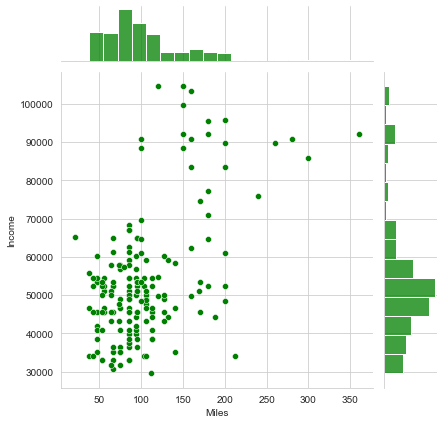

In [23]:
sns.jointplot(cust['Miles'], cust['Income'],color='green')
plt.show()

The majority of the dataset seek to run 100 miles and generally make around $50K per year.


# implement alternate coding approach for repetitive steps:  leveraging functions

In [24]:
#Cite Reference:  this snipet of code (function) is directly from the Great Learning UBER case study and reviewed with Shanky on 2021-10-23
#The goal of this code is to productionize repetitive code for any variable
# and imrove the efficiency of our coding + storage 
#this is an atlernative approach to all the individual distplot and boxplot commands above
#I changed the figure size to better fit with other graphics

def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# explore education

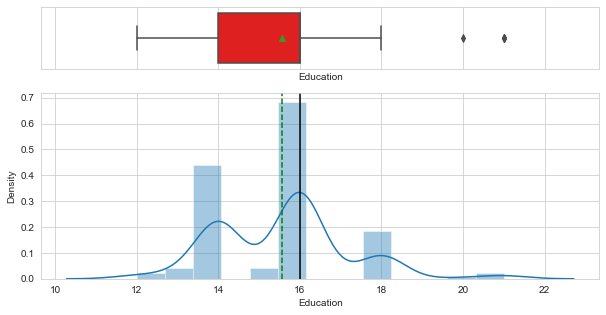

In [25]:
histogram_boxplot(cust.Education)

# explore age

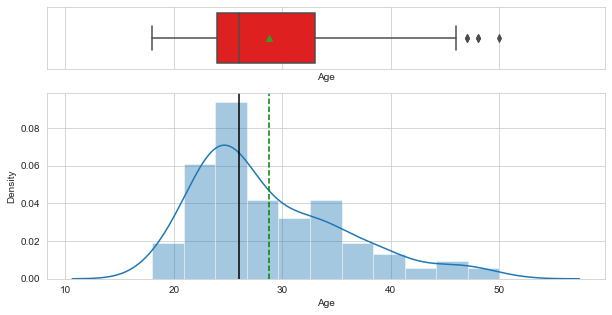

In [26]:
histogram_boxplot(cust.Age)

# explore miles

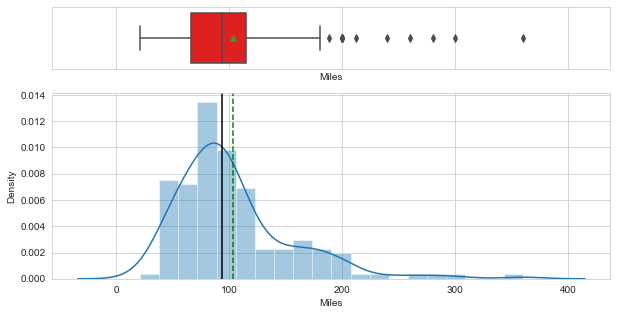

In [27]:
histogram_boxplot(cust.Miles)

# explore usage

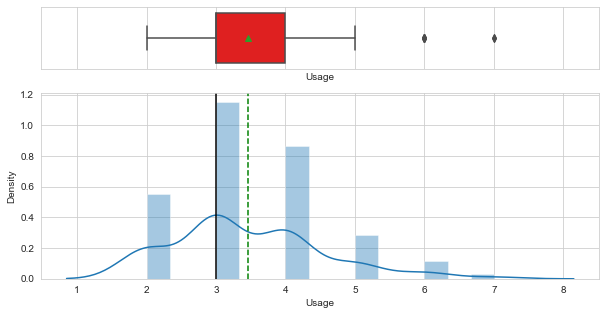

In [28]:
histogram_boxplot(cust.Usage)

# explore income

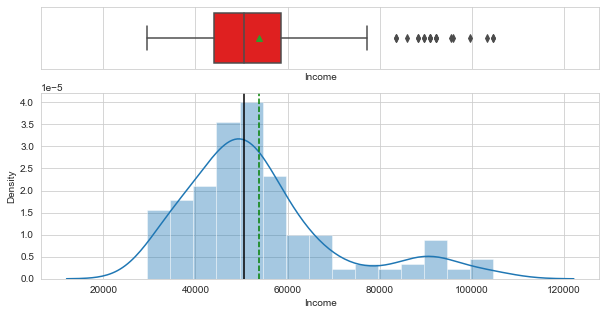

In [29]:
histogram_boxplot(cust.Income)

# explore fitness

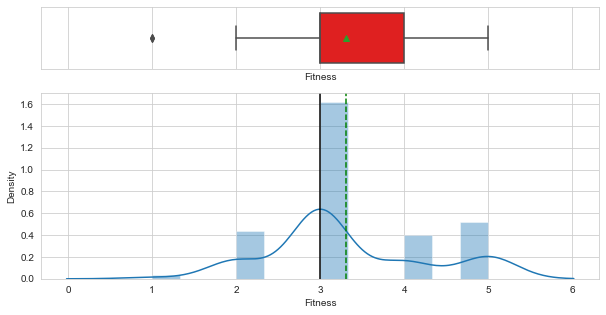

In [30]:
histogram_boxplot(cust.Fitness)

In [31]:
 # Categorial variables to explore
    
# 0   Product        180 non-null    category
# 2   Gender         180 non-null    category
# 4   MaritalStatus  180 non-null    category
 
 

# build a fucntion for categorial variables to address repetitive operations

In [32]:
#Cite Reference:  this snipet of code (function) is directly from the Great Learning UBER case study and reviewed with Shanky on 2021-10-23
#The goal of this code is to productionize repetitive code for any variable
# and imrove the efficiency of our coding + storage 
#this is an atlernative approach to all the individual bar chart via box plot commands
#I changed the figure size to better fit with other graphics

# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage





# observations on product


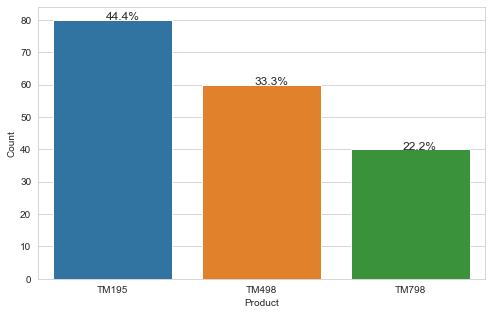

In [33]:
plt.figure(figsize=(8,5))
ax = sns.countplot(cust['Product'])
plt.xlabel ('Product')
plt.ylabel ('Count')
bar_perc (ax, cust['Product'])



1st place product:  TM195, 2nd:  TM498, 3rd: TM798
            

# observations on Gender

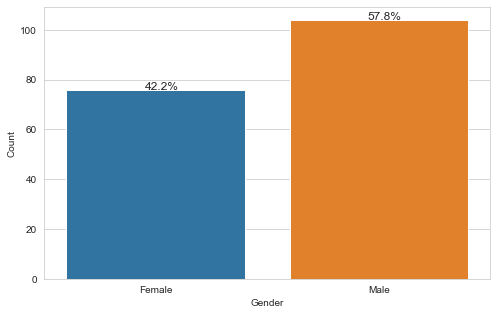

In [34]:
plt.figure(figsize=(8,5))
ax = sns.countplot(cust['Gender'])
plt.xlabel ('Gender')
plt.ylabel ('Count')
bar_perc (ax, cust['Gender'])


60% of the customers are Male

# observations on marital status

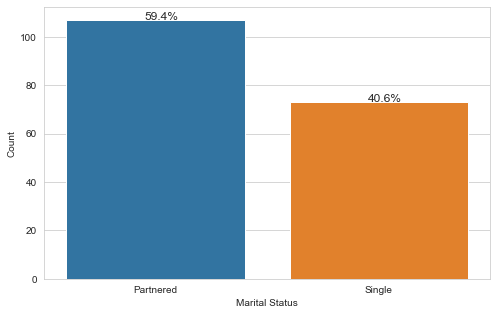

In [35]:
plt.figure(figsize=(8,5))
ax = sns.countplot(cust['MaritalStatus'])
plt.xlabel ('Marital Status')
plt.ylabel ('Count')
bar_perc (ax, cust['MaritalStatus'])

60% of the customer are partnered

# bivariate analysis of numerical data

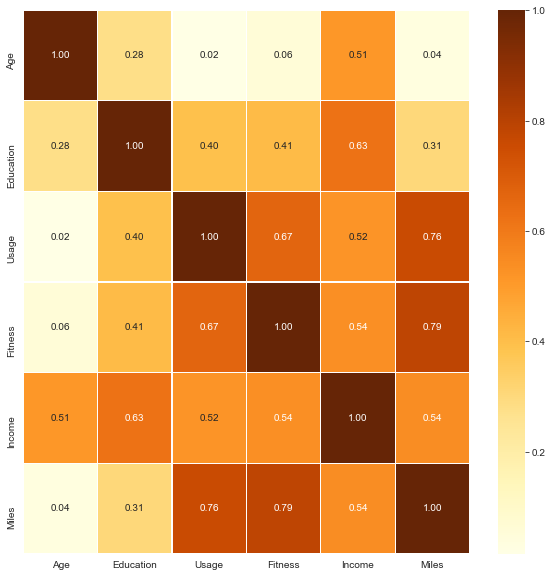

In [36]:
#pull a colormap from seaborn documentation to pair best with my .pptx template
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(cust.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="YlOrBr") 
plt.show()

Text(0.5, 0, 'Product')

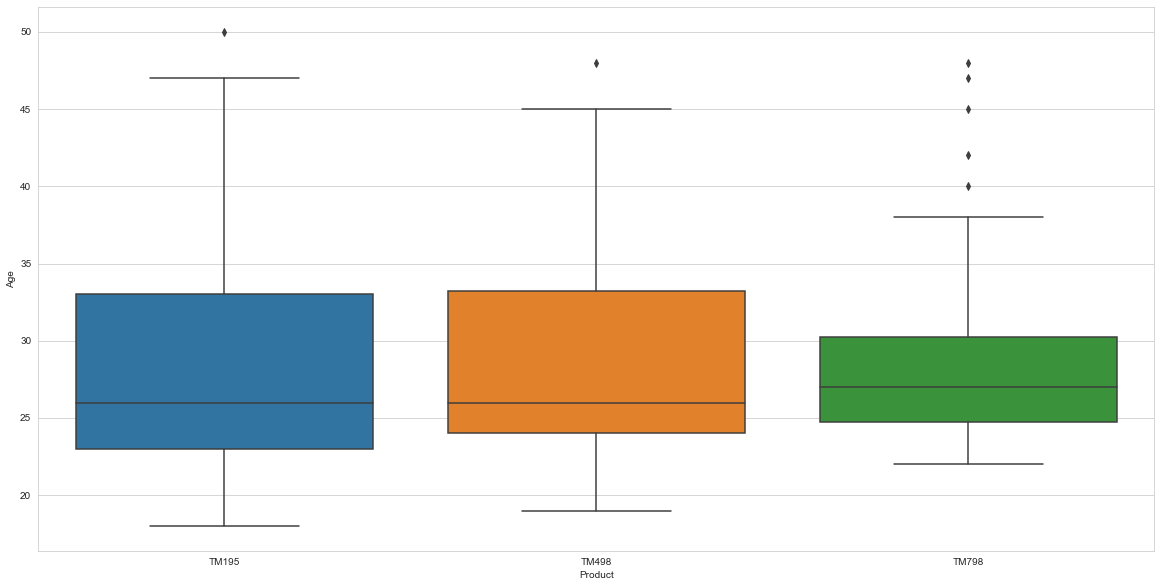

In [37]:
#explore Product v. Age

plt.figure(figsize=(20,10))           
sns.boxplot(cust['Product'],cust['Age'])
plt.ylabel('Age')
plt.xlabel('Product')

In [38]:
#One Hot Encode Marital Status to explore Model Preference by Marital Status.  
#MaritalStatus is a Category and needs to be a Number

cust_dummies= pd.get_dummies(cust, prefix='modified', columns = ['MaritalStatus']) #This function does One-Hot-Encoding on categorical text
cust_dummies.head(20)

#y = pd.get_dummies(df.Countries, prefix='Country')
#print(y.head())



,Product,Age,Gender,Education,Usage,Fitness,Income,Miles,modified_Partnered,modified_Single
0,TM195,18,Male,14,3,4,29562,112,0,1
1,TM195,19,Male,15,2,3,31836,75,0,1
2,TM195,19,Female,14,4,3,30699,66,1,0
3,TM195,19,Male,12,3,3,32973,85,0,1
4,TM195,20,Male,13,4,2,35247,47,1,0
5,TM195,20,Female,14,3,3,32973,66,1,0
6,TM195,21,Female,14,3,3,35247,75,1,0
7,TM195,21,Male,13,3,3,32973,85,0,1
8,TM195,21,Male,15,5,4,35247,141,0,1
9,TM195,21,Female,15,2,3,37521,85,1,0


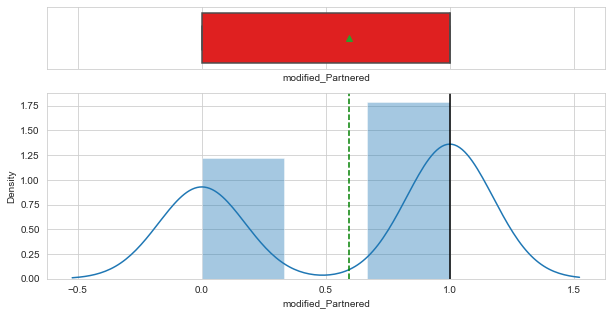

In [39]:
#explore Product vs. MaritalStatus after One Hot Encoding
histogram_boxplot(cust_dummies.modified_Partnered)

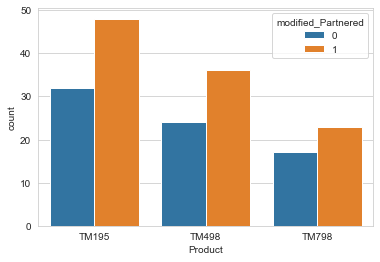

In [40]:
#How many Partnered/Single people buy each product type
sns.countplot(cust_dummies['Product'], hue = cust_dummies['modified_Partnered'])
plt.show()

What do we know about Customer's Marital status by Product Type?

For all Product Model Types, 30%-50% more customers are Partnered.

Text(0.5, 0, 'Product')

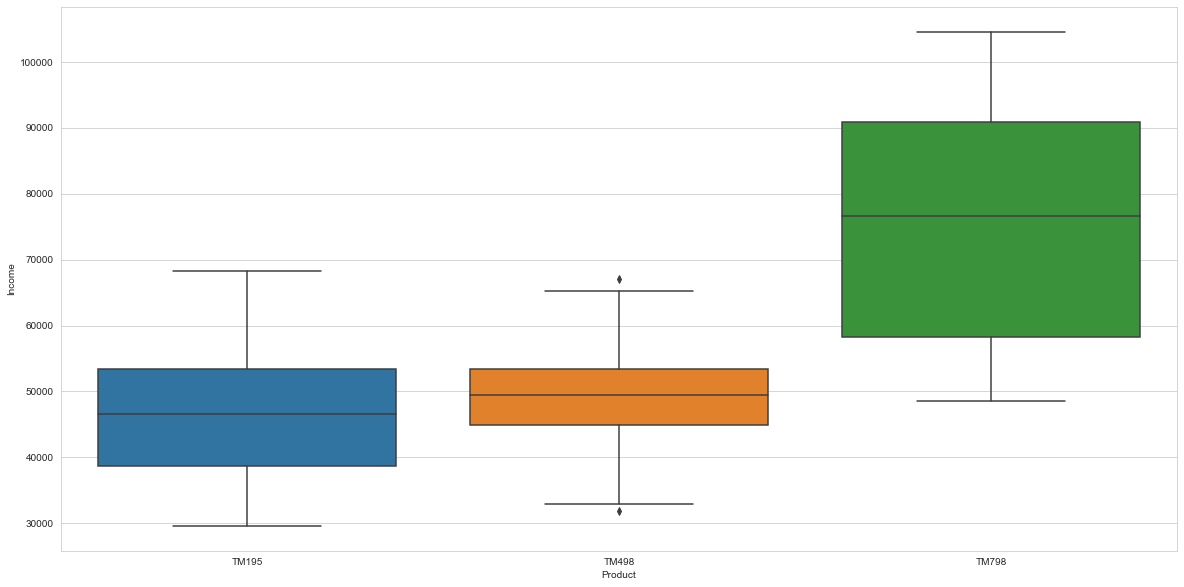

In [41]:
#explore Product vs. Income

plt.figure(figsize=(20,10))           
sns.boxplot(cust['Product'],cust['Income'])
plt.ylabel('Income')
plt.xlabel('Product')

Text(0.5, 0, 'Product')

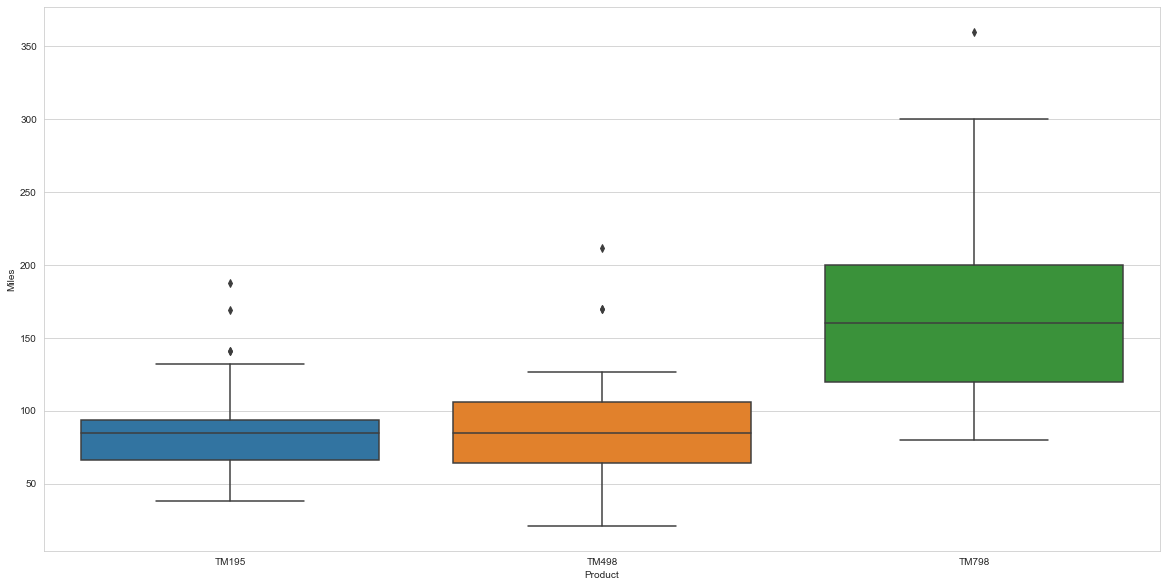

In [42]:
#explore Product vs. Miles

plt.figure(figsize=(20,10))           
sns.boxplot(cust['Product'],cust['Miles'])
plt.ylabel('Miles')
plt.xlabel('Product')

Text(0.5, 0, 'Product')

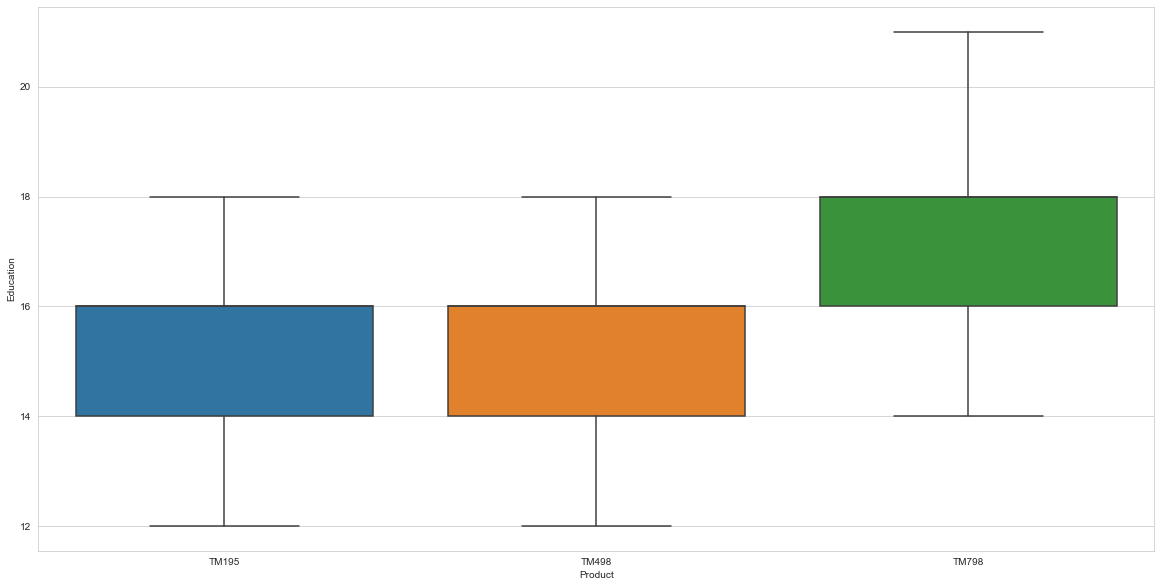

In [43]:
#explore Product vs. Education

plt.figure(figsize=(20,10))           
sns.boxplot(cust['Product'],cust['Education'])
plt.ylabel('Education')
plt.xlabel('Product')

Text(0.5, 0, 'Product')

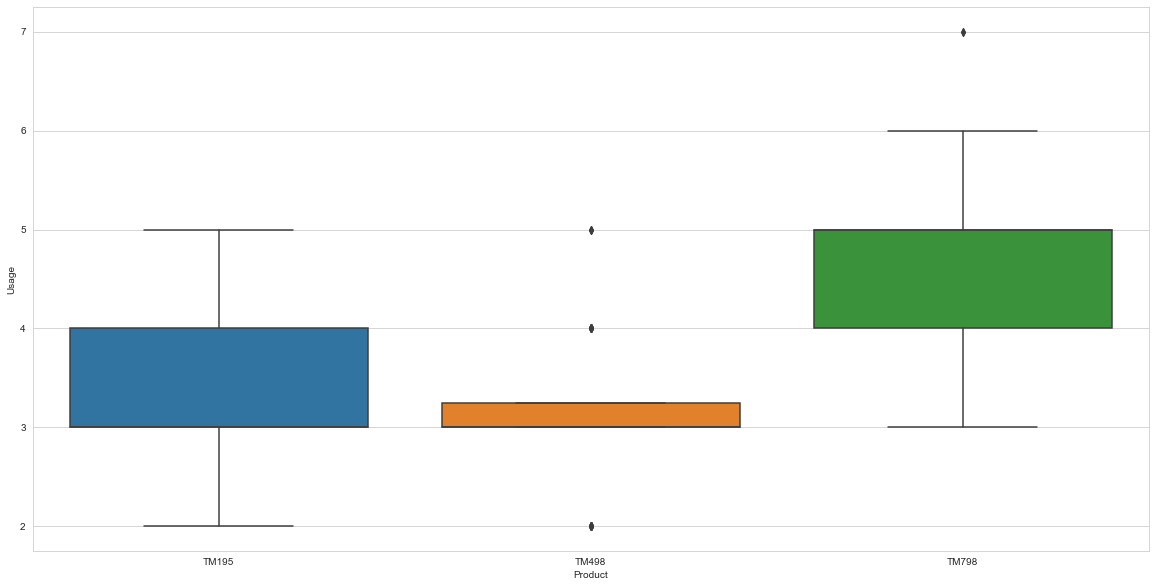

In [44]:
#explore Product vs. Usage

plt.figure(figsize=(20,10))           
sns.boxplot(cust['Product'],cust['Usage'])
plt.ylabel('Usage')
plt.xlabel('Product')

We see that TM195 users will mostly use it 3-4 times per week.
TM498 users are dispersed but central tendency is 3 times per week.
TM798 users will tend to use it more, beteen 4-5 times per week and the usage is positively skewed toward a max of 6-7 days per week at the extremes.

Text(0.5, 0, 'Product')

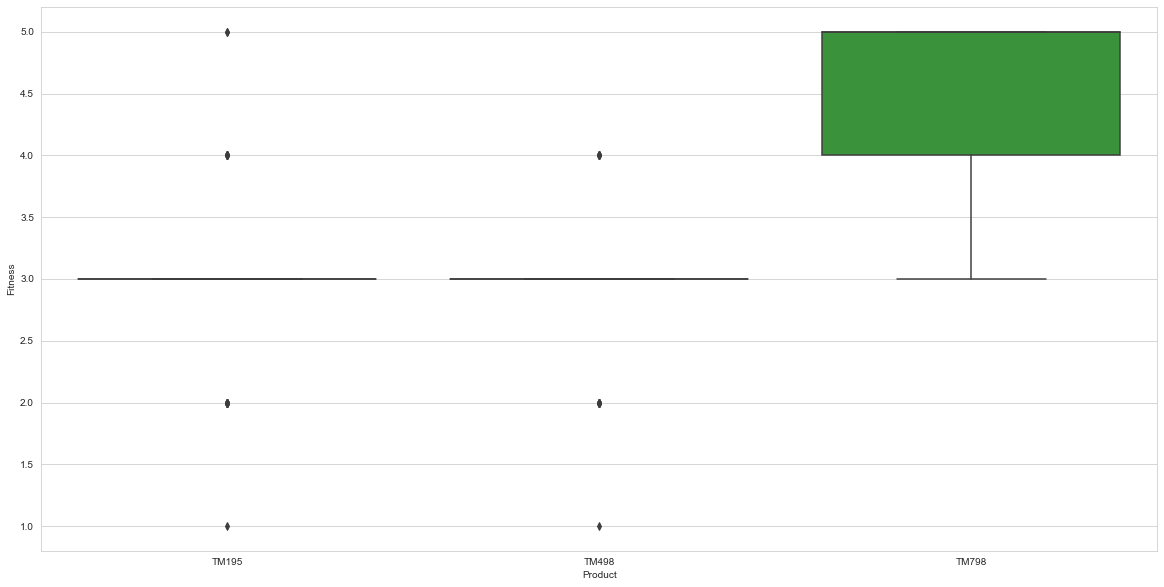

In [45]:
#explore Product vs. Fitness

plt.figure(figsize=(20,10))           
sns.boxplot(cust['Product'],cust['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Product')

# bivariate analysis

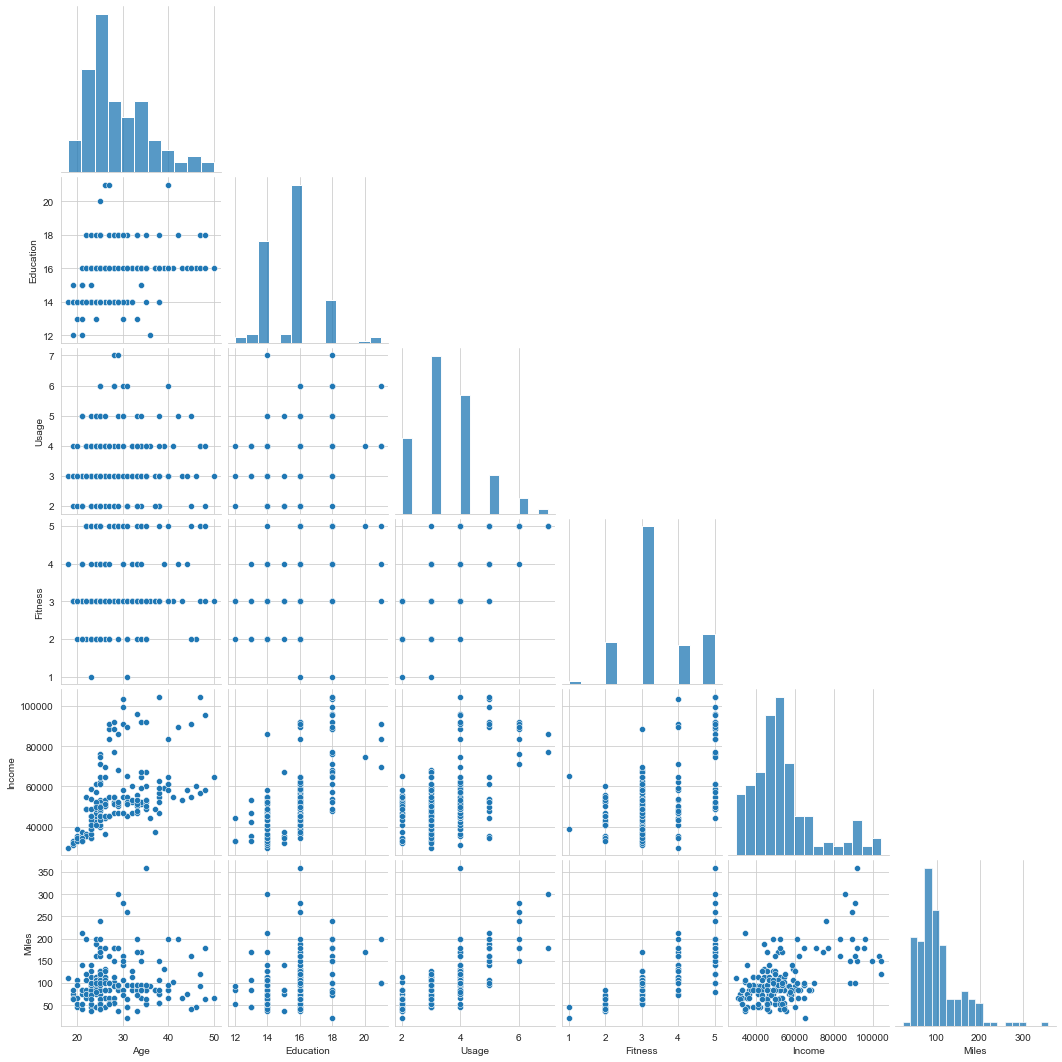

In [46]:
# Explore High-level Customer Attributes relationship to product types

sns.pairplot(cust, corner = True)

plt.show()



# pandas profiling


In [47]:
#install pandas-profiling
!pip install pandas-profiling==2.8.0


In [48]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof
